## __EN2550 _ Exercise 07__

### Index Number : 190328V
### Name         : KUMARA B.W.J.C.

### __Q1).__

Text(0.5, 0, 'z')

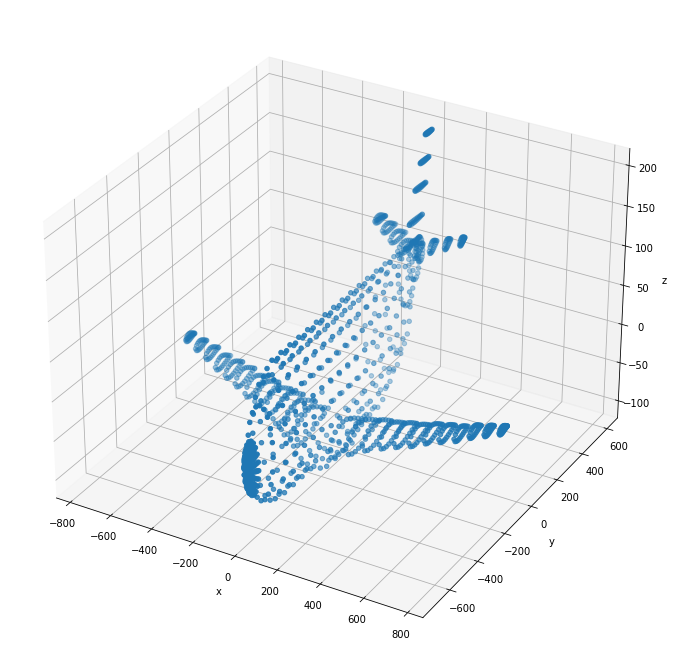

In [22]:
import numpy as np
import sympy as sy
import matplotlib.pyplot as plt
import cv2 as cv
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from plyfile import PlyData,PlyElement

pcd = PlyData.read('./Files/airplane.ply')
assert pcd is not None

points = np.concatenate((pcd['vertex']['x'].reshape(1,-1),pcd['vertex']['y'].reshape(1,-1),pcd['vertex']['z'].reshape(1,-1)),axis =0)
points = points - np.mean(points, axis=1).reshape(3,1) 

fig = plt.figure(figsize=(12,12),facecolor='white')
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(points[0,:],points[1,:],points[2,:])

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

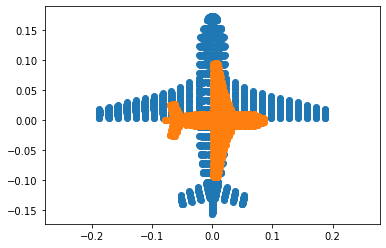

In [24]:

ones =  np.ones((1,points.shape[1]))
X = np.concatenate((points,ones),axis =0)

R = np.array([[1,0,0],[0,1,0],[0,0,1]])
K = np.array([[1,0,0],[0,1,0],[0,0,1]])
t = np.array([[0],[0],[-4000]])

P1 = K @ np.concatenate((R,t),axis =1)

x1 = P1 @ X
x1 = x1/x1[2,:]

R = np.array([[0,1,0],[1,0,0],[0,0,1]])
K = np.array([[0.5,0,0],[0,0.5,0],[0,0,1]])
t = np.array([[0],[0],[-4000]])

P2 = K @ np.concatenate((R,t),axis =1)


x2 = P2 @ X
x2 = x2/x2[2,:]

fig, ax = plt.subplots(1,1,sharex = True, sharey = True,facecolor ='white')
ax.scatter(x1[0,:],x1[1,:])
ax.scatter(x2[0,:],x2[1,:])
ax.axis('equal')
plt.show()

### __Q3).__

Item 1 area in pixels = 59143
Item 1 area in pixels = 2318.642172
Item 2 area in pixels = 59211
Item 2 area in pixels = 2321.3080440000003


Text(0.5, 1.0, 'Color Mapped Image')

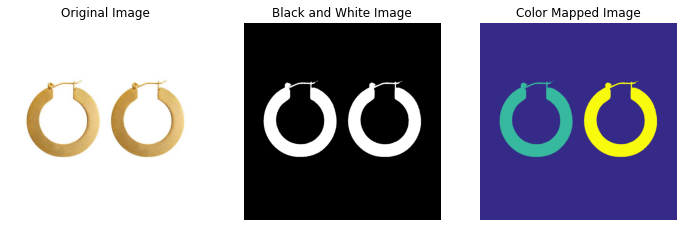

In [26]:
im=cv.imread('./Files/earrings.jpg',cv.IMREAD_COLOR)
assert im is not None

hsv = cv.cvtColor(im,cv.COLOR_BGR2HSV)
th,bw = cv.threshold(hsv[:,:,1],0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

# remove dots 
w=5
kernel = np.ones((w,w),np.uint8)
opened = cv.morphologyEx(bw,cv.MORPH_CLOSE,kernel)

retval , labels,stats,centroids = cv.connectedComponentsWithStats(bw)
colormapped = cv.applyColorMap((labels/np.amax(labels)*255).astype('uint8'),cv.COLORMAP_PARULA) 

Z = 720
f = 8

for i,s in enumerate(stats):
    if i!=0:
        print('Item',i,'area in pixels =',s[4])
        print('Item',i,'area in pixels =',s[4]*(2.2e-3)**2*(Z*Z)/(f*f))

fig,ax = plt.subplots(1,3,figsize=(12,12),facecolor ='white')
f_ = cv.cvtColor(im,cv.COLOR_BGR2RGB)
ax[0].axis('off')
ax[0].imshow(f_)
ax[0].set_title("Original Image")

f_ = cv.cvtColor(bw,cv.COLOR_BGR2RGB)
ax[1].axis('off')
ax[1].imshow(f_)
ax[1].set_title("Black and White Image")

f_ = cv.cvtColor(colormapped,cv.COLOR_BGR2RGB)
ax[2].axis('off')
ax[2].imshow(f_)
ax[2].set_title("Color Mapped Image")